**<span style="font-size:larger;">Demonstration of Convolutional Neural Network (CNN)</span>**

**Topics**

1. Key Components of CNN

2. Data Preprocessing

3. Architecture of the CNN Model used in this tutorial

4. Model Compilation Explanation
  
5. Training of QCNN 

6. Testing and Evaluation of QCNN

7. References

8. About the Author




# KEY COMPONENTS OF CNN

A Convolutional Neural Network (CNN) is a specialized architecture for processing structured grid data, commonly used in computer vision. Key components include:

- **Feature Extraction:** Convolutional layers use learnable filters to scan input images.
- **Pattern Recognition:** Hierarchical feature extraction enables the network to recognize complex patterns.
- **Translation Invariance:** Weight sharing in convolutional layers provides translation invariance.
- **Pooling and Down-sampling:** Pooling layers down-sample feature maps.
- **Non-Linearity (Activation):** Activation functions introduce non-linearity, e.g., ReLU.
- **Flatten Layer:** The Flatten layer in the convolutional neural network (CNN) model transforms the 3D output from the convolutional and pooling layers into a 1D array, facilitating the transition from spatial feature maps to a fully connected layer for subsequent classification.
- **Fully Connected Layers:** Capture global patterns in the data.
- **Output Layer:** For classification, the output layer uses softmax activation.

By leveraging these operations, CNNs excel in image recognition, object detection, and computer vision tasks.

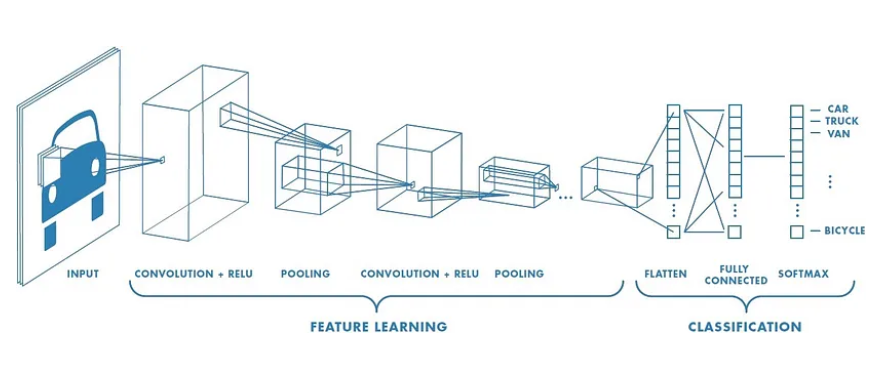
*Image Source: [Qiskit Machine Learning 0.7.1](https://qiskit.org/ecosystem/machine-learning/tutorials/11_quantum_convolutional_neural_networks.html#7.-References)*

# DATA PREPROCESSING

In [30]:
import os

# Replace '/path/to/your/image_dataset/' with the correct path to your image dataset directory
dataset_dir = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray"

for dirname, _, filenames in os.walk(dataset_dir):
    for filename in filenames:
        # Print the complete path to each file in the dataset
        print(os.path.join(dirname, filename))


In [2]:
import pandas as pd
def create_dataframe(folder_path, label, result):
    filenames = os.listdir(folder_path)
    full_paths = [os.path.join(folder_path, filename) for filename in filenames if not filename.startswith('.DS_Store')]
    dataframe = pd.DataFrame({
        "Filename": full_paths,
        "Label": label,
        "Chest X-Ray": result
    })
    return dataframe

# creating dataframe for training and testing data
folder_path = "C:\\Users\\Hp\\Downloads\\archive (4)\\chest_xray\\chest_xray"

train_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\NORMAL"
df_train = create_dataframe(train_normal_path, 'train', 'Normal')

train_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\PNEUMONIA"
df_train = pd.concat([df_train, create_dataframe(train_pneumonia_path, 'train', 'Pneumonia')])
df_train

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal
...,...,...,...
3870,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3871,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3872,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia
3873,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Pneumonia


In [3]:
test_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\test\\NORMAL"
df_test = create_dataframe(test_normal_path, 'test', 'Normal')

test_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\test\\PNEUMONIA"
df_test = pd.concat([df_test, create_dataframe(test_pneumonia_path, 'test', 'Pneumonia')])
df_test

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Normal
...,...,...,...
385,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
386,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
387,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia
388,C:\Users\riakh\Downloads\archive (4)\chest_xra...,test,Pneumonia


In [4]:
val_normal_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\val\\NORMAL"
df_val = create_dataframe(val_normal_path, 'val', 'Normal')

val_pneumonia_path = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\val\\PNEUMONIA"
df_val = pd.concat([df_val, create_dataframe(val_pneumonia_path, 'val', 'Pneumonia')])
df_val

,Filename,Label,Chest X-Ray
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
7,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia


In [5]:
train_normal_img = df_train[df_train['Label'] == 'train'][df_train['Chest X-Ray'] == 'Normal']['Filename']

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import matplotlib.pyplot as plt
import cv2

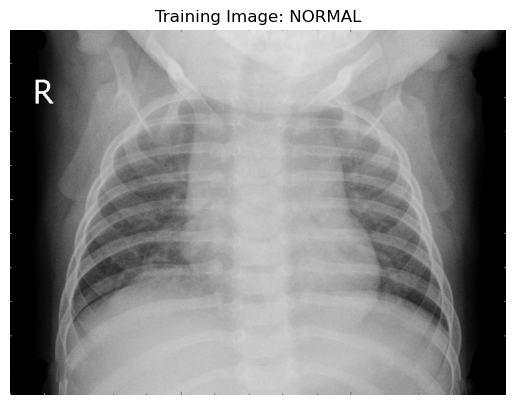

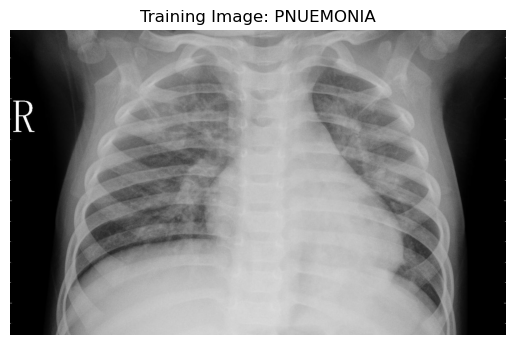

In [8]:
import os

first_normal_image_filename = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\NORMAL\\NORMAL2-IM-1356-0001.jpeg"
first_pneumonia_image_filename = "C:\\Users\\riakh\\Downloads\\archive (4)\\chest_xray\\train\\PNEUMONIA\\person1009_virus_1694.jpeg"
if os.path.exists(first_normal_image_filename):
    img_normal = cv2.imread(first_normal_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: NORMAL')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')
if os.path.exists(first_pneumonia_image_filename):
    img_normal = cv2.imread(first_pneumonia_image_filename)
    plt.imshow(cv2.cvtColor(img_normal, cv2.COLOR_BGR2RGB))
    plt.title('Training Image: PNUEMONIA')
    plt.axis('off')
    plt.show()
else:
    print('The image does not exist.')    
    

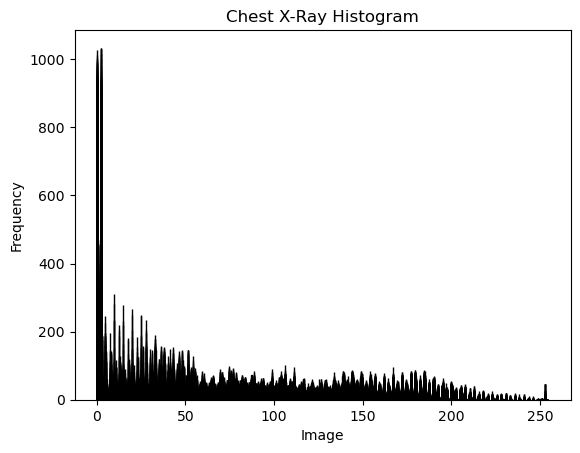

In [9]:
import cv2

normal_img = cv2.imread(df_train.iloc[1,0])
normal_img = cv2.cvtColor(normal_img, cv2.COLOR_BGR2GRAY)
pneumonia_img = cv2.imread(df_train.iloc[-1,0])
pneumonia_img = cv2.cvtColor(pneumonia_img, cv2.COLOR_BGR2GRAY)

plt.hist(normal_img, bins=100, edgecolor='black')
plt.xlabel('Image')
plt.ylabel('Frequency')
plt.title('Chest X-Ray Histogram')
plt.show()

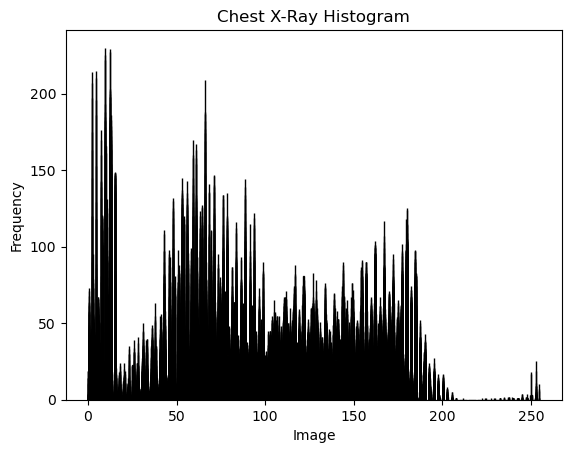

In [10]:
plt.hist(pneumonia_img, bins=100, edgecolor='black')
plt.xlabel('Image')
plt.ylabel('Frequency')
plt.title('Chest X-Ray Histogram')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

df = pd.concat([df_train, df_test, df_val])
df['result'] = (df['Chest X-Ray'] == 'Pneumonia')
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,False
...,...,...,...,...
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,True


In [12]:
df['result'].replace(True, 1, inplace=True)
df['result'].replace(False, 0, inplace=True)
df

,Filename,Label,Chest X-Ray,result
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,0
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,0
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,0
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,0
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,train,Normal,0
...,...,...,...,...
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1


In [13]:
l1, l2, l3 = len(df_train), len(df_train)+len(df_test), len(df_train)+len(df_test)+len(df_val)
train, test, val = df.iloc[:l1, :], df.iloc[l1:l2, :], df.iloc[l2:,:]
val

,Filename,Label,Chest X-Ray,result
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
2,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
3,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
4,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
5,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
6,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
7,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Normal,0
0,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1
1,C:\Users\riakh\Downloads\archive (4)\chest_xra...,val,Pneumonia,1


In [14]:
IMG_HEIGHT, IMG_WIDTH = 4, 2

In [15]:
pip install --upgrade jax jaxlib


  Obtaining dependency information for jax from https://files.pythonhosted.org/packages/28/d0/edf653ea02628f2130ea2557f96d02b264768a2f54d22a9c002c7119cb1d/jax-0.4.23-py3-none-any.whl.metadata
  Using cached jax-0.4.23-py3-none-any.whl.metadata (24 kB)
  Obtaining dependency information for jaxlib from https://files.pythonhosted.org/packages/67/c7/9ba88bc705a6dd87838c4bffa578b524c9a558ef6f16968a2c85777c14a6/jaxlib-0.4.23-cp311-cp311-win_amd64.whl.metadata
  Using cached jaxlib-0.4.23-cp311-cp311-win_amd64.whl.metadata (2.1 kB)
  Obtaining dependency information for ml-dtypes>=0.2.0 from https://files.pythonhosted.org/packages/a4/db/1784b87285588788170f87e987bfb4bda218d62a70a81ebb66c94e7f9b95/ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata
  Using cached ml_dtypes-0.3.2-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
Using cached jax-0.4.23-py3-none-any.whl (1.7 MB)
   ---------------------------------------- 0.0/46.0 MB ? eta -:--:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/02/8c/dc970bc00867fe290e8c8a7b


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Dropout

# ARCHITECTURE OF THE CNN MODEL USED IN THIS TUTORIAL

The given Convolutional Neural Network (CNN) model consists of the following layers:

- **Convolutional Layers:**
  - The first convolutional layer has 32 filters of size (3, 3) with ReLU activation, maintaining the input shape.
  - MaxPooling2D layer with a (2, 2) pool size and stride 2.
  
  - The second convolutional layer has 64 filters of size (3, 3) with ReLU activation.
  - MaxPooling2D layer with a (2, 2) pool size.
  
  - The third convolutional layer has 128 filters of size (3, 3) with ReLU activation.
  - MaxPooling2D layer with a (2, 2) pool size.

- **Flatten Layer:**
  - Flattens the output to a 1D array before passing to the dense layers.

- **Dense (Fully Connected) Layer:**
  - Output layer with a single neuron and sigmoid activation, suitable for binary classification.

- **Activation Functions:**
  - ReLU (Rectified Linear Unit) is used in convolutional layers to introduce non-linearity.
  - Sigmoid activation in the output layer for binary classification.

- **Dropout (Commented Out):**
  - Optional dropout layers can be uncommented to prevent overfitting by randomly setting a fraction of input units to zero.

This architecture is suitable for binary image classification tasks.

In [1]:
def CNN_Model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 1)))
    model.add(MaxPooling2D((2, 2), strides=2, padding='same'))
    
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    
    model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    #model.add(Dropout(0.15))
    model.add(MaxPooling2D((2, 2), padding='same'))
    
   # model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
    # model.add(MaxPooling2D((2, 2), padding='same'))
    
#     model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
#     model.add(Dropout(0.15))
#     model.add(MaxPooling2D((2, 2), padding='same'))
    
    model.add(Flatten())
#     model.add(Dense(256, activation='relu'))
#     model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

This code utilizes the plot_model function from tensorflow.keras.utils to generate a visual representation (PNG file) of the CNN model architecture. The parameters passed to plot_model specify various settings, such as displaying shapes and layer names, adjusting the direction of the graph (rankdir='TB' for top-to-bottom, 'LR' for left -to-right), and setting the DPI (dots per inch) to 96.

After saving the plots as 'cnn_model_plot_1.png' and 'cnn_model_plot_2.png', the code uses Image from IPython.display to display the saved images directly within the notebook. This allows you to visualize the architecture of the CNN model directly in the notebook environment without the need to download and open the PNG files separately.

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

model = CNN_Model()

# Provide the input shape when calling plot_model
plot_model(model, to_file='cnn_model_plot_1.png', show_shapes=True, show_layer_names=True, rankdir='TB', expand_nested=True, dpi=96)
plot_model(model, to_file='cnn_model_plot_2.png', show_shapes=True, show_layer_names=True, rankdir='LR', expand_nested=True, dpi=96)

# Display the saved image
Image('cnn_model_plot_1.png')
Image('cnn_model_plot_2.png')


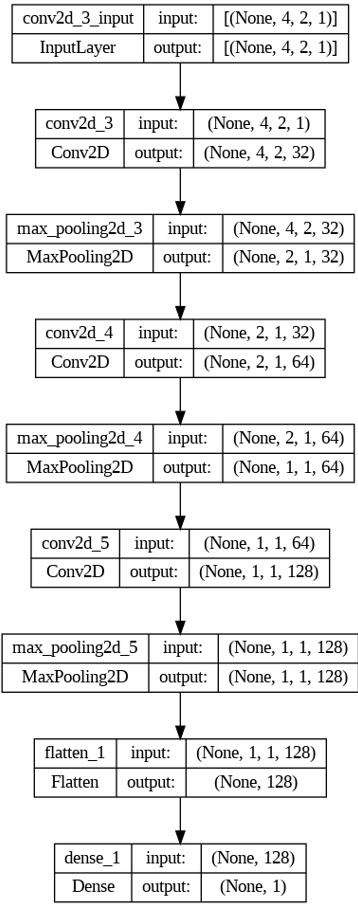

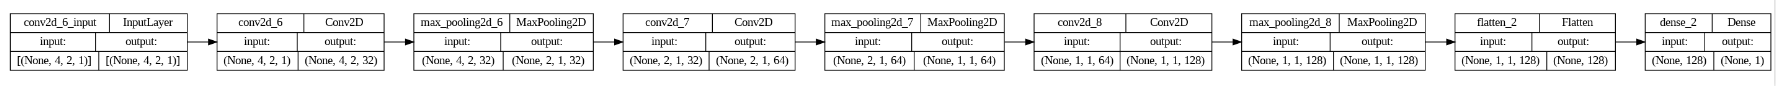

# MODEL COMPILATION EXPLANATION

### Optimizer - Adam

The Adam optimizer is employed for updating the weights of the neural network during the training process. It is an adaptive optimization algorithm that combines the benefits of two other popular optimizers: RMSprop and momentum. Adam adjusts the learning rates of each parameter individually, offering advantages like faster convergence and handling sparse gradients.

### Loss Function - Binary Crossentropy

Binary Crossentropy is a commonly used loss function for binary classification problems. In the context of this model, which performs binary image classification (presence or absence of a certain feature), Binary Crossentropy measures the difference between predicted and true labels for each example in the dataset. The goal during training is to minimize this loss, enhancing the model's ability to make accurate predictions.

### Metrics - Accuracy

Accuracy is a performance metric that measures the ratio of correctly predicted instances to the total instances. In the context of this model, accuracy represents the fraction of correctly classified images in the entire dataset. Maximizing accuracy is a common goal during training, indicating the model's proficiency in making correct predictions.

The combination of Adam optimizer, Binary Crossentropy loss, and accuracy metric forms a standard configuration for binary classification tasks.


In [ ]:
from tensorflow.keras.optimizers import Adam
model = CNN_Model()
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
import numpy as np
from PIL import Image
data_xx = df_train['Filename'].iloc[:].to_numpy()

images = []

for i in range(len(df_train)):
    image = cv2.cvtColor(cv2.imread(data_xx[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = (cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT)))/255.
    images.append(img)

In [ ]:
data_yy = df['result'].iloc[:l1]
result = np.array(data_yy)

# TRAINING OF CNN

**TEST-TRAIN SPLIT UP RATIO - 0.15**

In [ ]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.15)

In [ ]:
model.summary()

In [ ]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=10)

Epoch 1/10
139/139 [==============================] - 5s 8ms/step - loss: 0.5566 - accuracy: 0.7401 - val_loss: 0.4996 - val_accuracy: 0.7331
Epoch 2/10
139/139 [==============================] - 1s 6ms/step - loss: 0.4409 - accuracy: 0.7877 - val_loss: 0.4279 - val_accuracy: 0.7995
Epoch 3/10
139/139 [==============================] - 1s 5ms/step - loss: 0.4182 - accuracy: 0.7958 - val_loss: 0.4061 - val_accuracy: 0.7957
Epoch 4/10
139/139 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8065 - val_loss: 0.4483 - val_accuracy: 0.7842
Epoch 5/10
139/139 [==============================] - 1s 5ms/step - loss: 0.4044 - accuracy: 0.8114 - val_loss: 0.4000 - val_accuracy: 0.8072
Epoch 6/10
139/139 [==============================] - 1s 5ms/step - loss: 0.3952 - accuracy: 0.8148 - val_loss: 0.3956 - val_accuracy: 0.8084
Epoch 7/10
139/139 [==============================] - 1s 5ms/step - loss: 0.3970 - accuracy: 0.8128 - val_loss: 0.3883 - val_accuracy: 0.8225
Epoch 

In [ ]:
model.save("C:\\Users\\Hp\\Documents\\CNN_model_Qubrid")

INFO:tensorflow:Assets written to: C:\Users\Hp\Documents\CNN_model_Qubrid\assets


INFO:tensorflow:Assets written to: C:\Users\Hp\Documents\CNN_model_Qubrid\assets


In [ ]:
data = df_test['Filename'].iloc[:].to_numpy()

test_images = []
for i in range(len(df_test)):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    test_images.append(img)

test_images = np.array(test_images)
final_test_result = model.predict(test_images)

20/20 [==============================] - 0s 2ms/step


# TESTING AND EVALUATION OF CNN

In [ ]:
data_y = df['result'].iloc[l1:l2]
test_result = np.array(data_y)
final_test = (final_test_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(test_result, final_test)

0.6714743589743589

In [ ]:
datav = df_val['Filename'].iloc[:].to_numpy()

val_images = []
for i in range(len(df_val)):
    image = cv2.cvtColor(cv2.imread(datav[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    val_images.append(img)

val_images = np.array(val_images)
final_val_result = model.predict(val_images)

1/1 [==============================] - 0s 31ms/step


In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5625

**TEST-TRAIN SPLIT UP RATIO - 0.30**

In [ ]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.30)

In [ ]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=300)

Epoch 1/300
115/115 [==============================] - 1s 5ms/step - loss: 0.5069 - accuracy: 0.7603 - val_loss: 0.4822 - val_accuracy: 0.7776
Epoch 2/300
115/115 [==============================] - 0s 4ms/step - loss: 0.5071 - accuracy: 0.7592 - val_loss: 0.4832 - val_accuracy: 0.7776
Epoch 3/300
115/115 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.7623 - val_loss: 0.4827 - val_accuracy: 0.7776
Epoch 4/300
115/115 [==============================] - 0s 3ms/step - loss: 0.5050 - accuracy: 0.7639 - val_loss: 0.4933 - val_accuracy: 0.7744
Epoch 5/300
115/115 [==============================] - 0s 3ms/step - loss: 0.5058 - accuracy: 0.7623 - val_loss: 0.4829 - val_accuracy: 0.7712
Epoch 6/300
115/115 [==============================] - 0s 4ms/step - loss: 0.5067 - accuracy: 0.7612 - val_loss: 0.4887 - val_accuracy: 0.7796
Epoch 7/300
115/115 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7606 - val_loss: 0.4837 - val_accuracy: 0.7706

Epoch 58/300
115/115 [==============================] - 1s 4ms/step - loss: 0.4926 - accuracy: 0.7729 - val_loss: 0.4708 - val_accuracy: 0.7917
Epoch 59/300
115/115 [==============================] - 1s 5ms/step - loss: 0.4936 - accuracy: 0.7718 - val_loss: 0.4691 - val_accuracy: 0.7898
Epoch 60/300
115/115 [==============================] - 1s 5ms/step - loss: 0.4951 - accuracy: 0.7713 - val_loss: 0.4674 - val_accuracy: 0.7898
Epoch 61/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4915 - accuracy: 0.7724 - val_loss: 0.4713 - val_accuracy: 0.7879
Epoch 62/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4910 - accuracy: 0.7740 - val_loss: 0.4751 - val_accuracy: 0.7987
Epoch 63/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4900 - accuracy: 0.7749 - val_loss: 0.4672 - val_accuracy: 0.7891
Epoch 64/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.7721 - val_loss: 0.4800 - val_accuracy:

Epoch 115/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4718 - accuracy: 0.7806 - val_loss: 0.4705 - val_accuracy: 0.7904
Epoch 116/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4729 - accuracy: 0.7781 - val_loss: 0.4624 - val_accuracy: 0.7891
Epoch 117/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4720 - accuracy: 0.7773 - val_loss: 0.4696 - val_accuracy: 0.7885
Epoch 118/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4723 - accuracy: 0.7787 - val_loss: 0.4631 - val_accuracy: 0.7898
Epoch 119/300
115/115 [==============================] - 1s 5ms/step - loss: 0.4729 - accuracy: 0.7776 - val_loss: 0.4628 - val_accuracy: 0.7859
Epoch 120/300
115/115 [==============================] - 1s 5ms/step - loss: 0.4732 - accuracy: 0.7812 - val_loss: 0.4609 - val_accuracy: 0.7898
Epoch 121/300
115/115 [==============================] - 1s 5ms/step - loss: 0.4710 - accuracy: 0.7795 - val_loss: 0.4610 - val_ac

115/115 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7795 - val_loss: 0.4736 - val_accuracy: 0.7879
Epoch 172/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4693 - accuracy: 0.7784 - val_loss: 0.4685 - val_accuracy: 0.7827
Epoch 173/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4707 - accuracy: 0.7823 - val_loss: 0.4851 - val_accuracy: 0.7783
Epoch 174/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4711 - accuracy: 0.7781 - val_loss: 0.4646 - val_accuracy: 0.7815
Epoch 175/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4708 - accuracy: 0.7743 - val_loss: 0.4689 - val_accuracy: 0.7815
Epoch 176/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4691 - accuracy: 0.7787 - val_loss: 0.4638 - val_accuracy: 0.7847
Epoch 177/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4679 - accuracy: 0.7798 - val_loss: 0.4782 - val_accuracy: 0.7866

115/115 [==============================] - 0s 4ms/step - loss: 0.4641 - accuracy: 0.7795 - val_loss: 0.4690 - val_accuracy: 0.7808
Epoch 228/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4667 - accuracy: 0.7784 - val_loss: 0.4634 - val_accuracy: 0.7872
Epoch 229/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4641 - accuracy: 0.7814 - val_loss: 0.4665 - val_accuracy: 0.7808
Epoch 230/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4663 - accuracy: 0.7792 - val_loss: 0.4644 - val_accuracy: 0.7853
Epoch 231/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4652 - accuracy: 0.7768 - val_loss: 0.4636 - val_accuracy: 0.7859
Epoch 232/300
115/115 [==============================] - 1s 4ms/step - loss: 0.4648 - accuracy: 0.7784 - val_loss: 0.4644 - val_accuracy: 0.7853
Epoch 233/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4643 - accuracy: 0.7784 - val_loss: 0.4633 - val_accuracy: 0.7879

115/115 [==============================] - 0s 3ms/step - loss: 0.4607 - accuracy: 0.7820 - val_loss: 0.4732 - val_accuracy: 0.7923
Epoch 284/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.7812 - val_loss: 0.4717 - val_accuracy: 0.7923
Epoch 285/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4592 - accuracy: 0.7844 - val_loss: 0.4671 - val_accuracy: 0.7879
Epoch 286/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4623 - accuracy: 0.7809 - val_loss: 0.4645 - val_accuracy: 0.7834
Epoch 287/300
115/115 [==============================] - 0s 3ms/step - loss: 0.4565 - accuracy: 0.7825 - val_loss: 0.4674 - val_accuracy: 0.7859
Epoch 288/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4583 - accuracy: 0.7836 - val_loss: 0.4661 - val_accuracy: 0.7859
Epoch 289/300
115/115 [==============================] - 0s 4ms/step - loss: 0.4601 - accuracy: 0.7823 - val_loss: 0.4644 - val_accuracy: 0.7885

In [ ]:
data = df_test['Filename'].iloc[:].to_numpy()

test_images = []
for i in range(len(df_test)):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    test_images.append(img)

test_images = np.array(test_images)
final_test_result = model.predict(test_images)

20/20 [==============================] - 0s 2ms/step


In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

**TEST-TRAIN SPLIT UP RATIO - 0.40**

In [ ]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.40)

In [ ]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=400)

Epoch 1/400
98/98 [==============================] - 1s 6ms/step - loss: 0.4624 - accuracy: 0.7820 - val_loss: 0.4536 - val_accuracy: 0.7887
Epoch 2/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4640 - accuracy: 0.7804 - val_loss: 0.4552 - val_accuracy: 0.7868
Epoch 3/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7824 - val_loss: 0.4580 - val_accuracy: 0.7849
Epoch 4/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.7843 - val_loss: 0.4587 - val_accuracy: 0.7863
Epoch 5/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4602 - accuracy: 0.7792 - val_loss: 0.4560 - val_accuracy: 0.7877
Epoch 6/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4611 - accuracy: 0.7785 - val_loss: 0.4607 - val_accuracy: 0.7815
Epoch 7/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4609 - accuracy: 0.7808 - val_loss: 0.4550 - val_accuracy: 0.7882
Epoch 8/400
9

Epoch 59/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.7836 - val_loss: 0.4644 - val_accuracy: 0.7753
Epoch 60/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4542 - accuracy: 0.7843 - val_loss: 0.4602 - val_accuracy: 0.7825
Epoch 61/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4543 - accuracy: 0.7846 - val_loss: 0.4599 - val_accuracy: 0.7772
Epoch 62/400
98/98 [==============================] - 0s 3ms/step - loss: 0.4546 - accuracy: 0.7849 - val_loss: 0.4605 - val_accuracy: 0.7853
Epoch 63/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4564 - accuracy: 0.7868 - val_loss: 0.4628 - val_accuracy: 0.7858
Epoch 64/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4538 - accuracy: 0.7843 - val_loss: 0.4581 - val_accuracy: 0.7853
Epoch 65/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4544 - accuracy: 0.7817 - val_loss: 0.4597 - val_accuracy: 0.7877
Epoch 

98/98 [==============================] - 0s 4ms/step - loss: 0.4515 - accuracy: 0.7824 - val_loss: 0.4777 - val_accuracy: 0.7686
Epoch 117/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4502 - accuracy: 0.7903 - val_loss: 0.4688 - val_accuracy: 0.7724
Epoch 118/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.7891 - val_loss: 0.4583 - val_accuracy: 0.7839
Epoch 119/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4513 - accuracy: 0.7852 - val_loss: 0.4642 - val_accuracy: 0.7767
Epoch 120/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4516 - accuracy: 0.7840 - val_loss: 0.4574 - val_accuracy: 0.7858
Epoch 121/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4508 - accuracy: 0.7907 - val_loss: 0.4651 - val_accuracy: 0.7844
Epoch 122/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4504 - accuracy: 0.7865 - val_loss: 0.4659 - val_accuracy: 0.7782
Epoch 123/400

98/98 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7865 - val_loss: 0.4659 - val_accuracy: 0.7849
Epoch 174/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4505 - accuracy: 0.7878 - val_loss: 0.4600 - val_accuracy: 0.7849
Epoch 175/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4464 - accuracy: 0.7872 - val_loss: 0.4607 - val_accuracy: 0.7858
Epoch 176/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4465 - accuracy: 0.7897 - val_loss: 0.4643 - val_accuracy: 0.7796
Epoch 177/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4474 - accuracy: 0.7862 - val_loss: 0.4615 - val_accuracy: 0.7815
Epoch 178/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4492 - accuracy: 0.7875 - val_loss: 0.4646 - val_accuracy: 0.7801
Epoch 179/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4471 - accuracy: 0.7865 - val_loss: 0.4653 - val_accuracy: 0.7796
Epoch 180/400

98/98 [==============================] - 0s 4ms/step - loss: 0.4452 - accuracy: 0.7881 - val_loss: 0.4623 - val_accuracy: 0.7758
Epoch 231/400
98/98 [==============================] - 1s 6ms/step - loss: 0.4446 - accuracy: 0.7913 - val_loss: 0.4604 - val_accuracy: 0.7796
Epoch 232/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4441 - accuracy: 0.7881 - val_loss: 0.4586 - val_accuracy: 0.7834
Epoch 233/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4455 - accuracy: 0.7910 - val_loss: 0.4608 - val_accuracy: 0.7810
Epoch 234/400
98/98 [==============================] - 0s 5ms/step - loss: 0.4498 - accuracy: 0.7849 - val_loss: 0.4636 - val_accuracy: 0.7882
Epoch 235/400
98/98 [==============================] - 1s 6ms/step - loss: 0.4469 - accuracy: 0.7948 - val_loss: 0.4594 - val_accuracy: 0.7810
Epoch 236/400
98/98 [==============================] - 0s 5ms/step - loss: 0.4451 - accuracy: 0.7859 - val_loss: 0.4602 - val_accuracy: 0.7834
Epoch 237/400

98/98 [==============================] - 0s 4ms/step - loss: 0.4440 - accuracy: 0.7939 - val_loss: 0.4581 - val_accuracy: 0.7829
Epoch 288/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.7916 - val_loss: 0.4705 - val_accuracy: 0.7834
Epoch 289/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.7939 - val_loss: 0.4674 - val_accuracy: 0.7753
Epoch 290/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4433 - accuracy: 0.7923 - val_loss: 0.4632 - val_accuracy: 0.7791
Epoch 291/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4462 - accuracy: 0.7862 - val_loss: 0.4727 - val_accuracy: 0.7719
Epoch 292/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4436 - accuracy: 0.7919 - val_loss: 0.4682 - val_accuracy: 0.7758
Epoch 293/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4435 - accuracy: 0.7888 - val_loss: 0.4593 - val_accuracy: 0.7834
Epoch 294/400

98/98 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.7907 - val_loss: 0.4592 - val_accuracy: 0.7810
Epoch 345/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7900 - val_loss: 0.4628 - val_accuracy: 0.7825
Epoch 346/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.7900 - val_loss: 0.4692 - val_accuracy: 0.7810
Epoch 347/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4460 - accuracy: 0.7926 - val_loss: 0.4616 - val_accuracy: 0.7834
Epoch 348/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4420 - accuracy: 0.7916 - val_loss: 0.4673 - val_accuracy: 0.7762
Epoch 349/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4451 - accuracy: 0.7888 - val_loss: 0.4623 - val_accuracy: 0.7844
Epoch 350/400
98/98 [==============================] - 0s 4ms/step - loss: 0.4448 - accuracy: 0.7923 - val_loss: 0.4635 - val_accuracy: 0.7791
Epoch 351/400

In [ ]:
data = df_test['Filename'].iloc[:].to_numpy()

test_images = []
for i in range(len(df_test)):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    test_images.append(img)

test_images = np.array(test_images)
final_test_result = model.predict(test_images)

20/20 [==============================] - 0s 2ms/step


In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

**TEST-TRAIN SPLIT UP RATIO - 0.50**

In [ ]:
images = np.array(images)
images_train, images_test, result_train, result_test  = train_test_split(images, result,test_size=0.50)

In [ ]:
history = model.fit(images_train,result_train, validation_data=(images_test,result_test), epochs=500)

82/82 [==============================] - 0s 5ms/step - loss: 0.4151 - accuracy: 0.8067 - val_loss: 0.4932 - val_accuracy: 0.7761
Epoch 257/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4146 - accuracy: 0.8140 - val_loss: 0.4952 - val_accuracy: 0.7707
Epoch 258/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4097 - accuracy: 0.8144 - val_loss: 0.4933 - val_accuracy: 0.7726
Epoch 259/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4130 - accuracy: 0.8106 - val_loss: 0.4931 - val_accuracy: 0.7768
Epoch 260/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4117 - accuracy: 0.8163 - val_loss: 0.4907 - val_accuracy: 0.7730
Epoch 261/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4105 - accuracy: 0.8090 - val_loss: 0.4929 - val_accuracy: 0.7742
Epoch 262/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4147 - accuracy: 0.8106 - val_loss: 0.4889 - val_accuracy: 0.7745
Epoch 263/500

82/82 [==============================] - 0s 5ms/step - loss: 0.4103 - accuracy: 0.8137 - val_loss: 0.4962 - val_accuracy: 0.7742
Epoch 314/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4073 - accuracy: 0.8117 - val_loss: 0.4925 - val_accuracy: 0.7768
Epoch 315/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4074 - accuracy: 0.8163 - val_loss: 0.5033 - val_accuracy: 0.7726
Epoch 316/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4070 - accuracy: 0.8179 - val_loss: 0.4978 - val_accuracy: 0.7757
Epoch 317/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4094 - accuracy: 0.8140 - val_loss: 0.5166 - val_accuracy: 0.7730
Epoch 318/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4077 - accuracy: 0.8098 - val_loss: 0.5019 - val_accuracy: 0.7742
Epoch 319/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4092 - accuracy: 0.8148 - val_loss: 0.4962 - val_accuracy: 0.7726
Epoch 320/500

82/82 [==============================] - 0s 5ms/step - loss: 0.4063 - accuracy: 0.8148 - val_loss: 0.5062 - val_accuracy: 0.7699
Epoch 371/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4060 - accuracy: 0.8102 - val_loss: 0.5021 - val_accuracy: 0.7719
Epoch 372/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4044 - accuracy: 0.8144 - val_loss: 0.4996 - val_accuracy: 0.7722
Epoch 373/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4045 - accuracy: 0.8113 - val_loss: 0.4999 - val_accuracy: 0.7757
Epoch 374/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4040 - accuracy: 0.8156 - val_loss: 0.5013 - val_accuracy: 0.7719
Epoch 375/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4014 - accuracy: 0.8156 - val_loss: 0.5008 - val_accuracy: 0.7738
Epoch 376/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4024 - accuracy: 0.8140 - val_loss: 0.5076 - val_accuracy: 0.7734
Epoch 377/500

82/82 [==============================] - 0s 5ms/step - loss: 0.4011 - accuracy: 0.8133 - val_loss: 0.5138 - val_accuracy: 0.7722
Epoch 428/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4015 - accuracy: 0.8137 - val_loss: 0.5078 - val_accuracy: 0.7726
Epoch 429/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4024 - accuracy: 0.8183 - val_loss: 0.5105 - val_accuracy: 0.7711
Epoch 430/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4043 - accuracy: 0.8144 - val_loss: 0.5109 - val_accuracy: 0.7719
Epoch 431/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4009 - accuracy: 0.8183 - val_loss: 0.5081 - val_accuracy: 0.7711
Epoch 432/500
82/82 [==============================] - 0s 5ms/step - loss: 0.4006 - accuracy: 0.8179 - val_loss: 0.5106 - val_accuracy: 0.7730
Epoch 433/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3974 - accuracy: 0.8148 - val_loss: 0.5143 - val_accuracy: 0.7730
Epoch 434/500

82/82 [==============================] - 0s 5ms/step - loss: 0.3976 - accuracy: 0.8198 - val_loss: 0.5113 - val_accuracy: 0.7699
Epoch 485/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3990 - accuracy: 0.8186 - val_loss: 0.5193 - val_accuracy: 0.7688
Epoch 486/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3971 - accuracy: 0.8167 - val_loss: 0.5077 - val_accuracy: 0.7707
Epoch 487/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3977 - accuracy: 0.8186 - val_loss: 0.5095 - val_accuracy: 0.7696
Epoch 488/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3965 - accuracy: 0.8190 - val_loss: 0.5144 - val_accuracy: 0.7696
Epoch 489/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3959 - accuracy: 0.8148 - val_loss: 0.5060 - val_accuracy: 0.7711
Epoch 490/500
82/82 [==============================] - 0s 5ms/step - loss: 0.3987 - accuracy: 0.8156 - val_loss: 0.5102 - val_accuracy: 0.7715
Epoch 491/500

In [ ]:
data = df_test['Filename'].iloc[:].to_numpy()

test_images = []
for i in range(len(df_test)):
    image = cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2GRAY)
    img = np.array(image)
    img = cv2.resize(img, (IMG_WIDTH, IMG_HEIGHT))/255
    test_images.append(img)

test_images = np.array(test_images)
final_test_result = model.predict(test_images)

20/20 [==============================] - 0s 2ms/step


In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

In [ ]:
data_ = df['result'].iloc[l2:]
val_result = np.array(data_)
final_val = (final_val_result>0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(val_result, final_val)

0.5

# REFERENCES

1. https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
2. https://qiskit.org/ecosystem/machine-learning/tutorials/11_quantum_convolutional_neural_networks.html#7.-References
3. https://www.ibm.com/cloud/learn/convolutional-neural-networks


# About the Author

Hi, I am Ria Khatoniar, a third-year undergraduate student pursuing Integrated Masters in Physics and B.E. in Computer Science and Engineering from BITS Pilani Goa Campus. My fascination with the immense potential of quantum computing has led me to delve into the field of quantum machine learning.As a KALPANA STEM Incubator fellow, I started developing interest in scientific research. I have gained research experience through internships at CDAC, Pune, National Chemical Laboratory, Pune, IIIT Hyderabad, and IIT Guwahati. Additionally, I've worked as a Quantum Researcher and Developer at Qubrid, Dihuni, USA, further enriching my expertise in quantum machine learning. With profound enthusiasm for the evolving quantum landscape, I aspire to explore its intricacies and pursue higher studies in the same. 

Feel free to connect with me! You can reach out to me via:
- Email: riakhatoniar1234@gmail.com
- LinkedIn: [Ria Khatoniar](https://www.linkedin.com/in/ria-khatoniar-275061207/?originalSubdomain=in)
